<a href="https://colab.research.google.com/github/MY1613/My-Work/blob/main/%EC%8B%AC%EC%A0%84%EB%8F%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%8B%AC%EC%9E%A5%EC%9D%98_%EC%A0%95%EC%83%81_%EB%B9%84%EC%A0%95%EC%83%81_%EC%97%AC%EB%B6%80_%EC%9E%90%EB%8F%99_%EC%9D%B8%EC%8B%9D_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ 심전도 데이터를 이용한 심장의 정상 / 비정상 여부 자동 인식 프로그램 ]

In [95]:
# pwd # 현재 위치 확인

In [96]:
# mkdir gdrive #  gdrive 디렉토리 생성

In [97]:
# ls

### 심전도 데이터 준비 

In [98]:
from google.colab import drive # 구글 드라이브와 마운트 하기 위해 구글.코랩 드라이브 호출

drive.mount('/content/gdrive')  # mount()함수 : 구글 드라이브에 연동

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [99]:
# cd '/content/gdrive/My Drive/Colab Notebooks/' # cd 폴더 위치변경

In [100]:
# mkdir ecg  # ecg 디렉토리 생성

#### 심전도 데이터 확인

In [101]:
import pandas as pd   # 데이터처리를 위한 라이브러리 호출 

data_no = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ecg/ptbdb_normal.csv') #read_csv() : ptbdb_normal.csv 파일 읽어서 data_no에 저장 : 건강한 피험자 데이터
data_ab = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ecg/ptbdb_abnormal.csv') # read_csv() : csv 파일 읽어서 data_ab에 저장 - 환자 데이터

In [102]:
data_no  # data_no 데이터 확인

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4041,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
data_ab  # data_ab 데이터 확인

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10501,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 데이터 기초 분석

In [104]:
import matplotlib.pyplot as plt # 데이터를 차트나 플롯으로 시각화 하기 위해 맷플롯립 패키지를 plt라는 이름으로 호출
import numpy as np  # 수치 데이터를 다루기 위해 넘파이 패키지를 np라는 이름으로 호출
import pandas as pd # 데이터 처리를 위해 판다스 라이브러리를 as 라는 이름으로 호출

data_no = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ecg/ptbdb_normal.csv')   # normal 엑셀 파일을 read_csv()로 불러와 pd 형태로 data_no에 저장
data_ab = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ecg/ptbdb_abnormal.csv')  # abnormal 엑셀 파일을 read_csv()로 불러와 pd 형태로 data_ab에 저장

data_no = np.array(data_no)  # 판다스 형태로 된 데이터를 array 형태로 바꿈
data_ab = np.array(data_ab)  # 판다스 형태로 된 데이터를 array 형태로 바꿈

In [105]:
data_no.shape  # .shape로 data_no 행열의 모양 확인

(4045, 188)

In [106]:
data_ab.shape # .shape로 data_ab 행열의 모양 확인

(10505, 188)

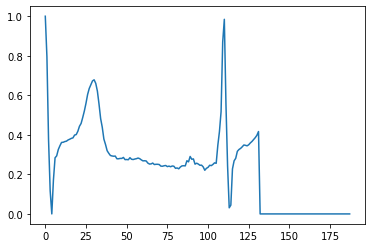

In [107]:
plt.plot(data_no[0,:]) # plot() : data_no의 0번째의 0 ~ 끝까지를 그래프로 출력

## 딥러닝

##### 1. 데이터를 사용하기 위한 변환

In [108]:
nTrain = 3000  # 훈련 데이터 3000개
nTest = 1000  # 테스트 데이터 1000개

x_train = np.concatenate((data_no[:nTrain,:], data_ab[:nTrain,:]),0)  # np.concatenate()함수 : 행렬끼리 붙여주는 함수 , 파라미터 (data_no[:nTrain,:], data_ab[:nTrain,:]) 각각 3000개 를 튜플로 묶어서 하나로
y_train = np.concatenate((np.zeros(nTrain,), np.ones(nTrain,)),0) # nomal = 0 3000개를 zeros()를 이용해 만들고, abnormal = 1 3000개를 ones()를 이용해 만듬

x_test = np.concatenate((data_no[nTrain:nTrain+nTest,:], data_ab[nTrain:nTrain+nTest,:]),0) # data_no[nTrain:nTrain+nTest,:] nTrain 부터 nTrain + nTest까지  
y_test = np.concatenate((np.zeros(nTest,), np.ones(nTest,)),0) # nTest 갯수 만큼 zeros() 이용하여 0 행렬 1000개, ones() 이용하여 1 1000개를 concatenate()로 붙여줌

In [109]:
x_train.shape # .shape를 이용하여 x_train의 행열 모양 확인

(6000, 188)

In [110]:
y_train.shape  # .shape를 이용하여 y_train의 행열 모양 확인

(6000,)

In [111]:
y_train  # 행렬에 0과 1이 잘 들어있는지 확인

array([0., 0., 0., ..., 1., 1., 1.])

In [112]:
from tensorflow.keras.utils import to_categorical # 원핫인코딩을 수행하기 위한 to_categorical를 사용하기위해 tensorflow.keras.utils에서 호출   

y_test = to_categorical(y_test) # 케라스에서 to_categorical()함수에 배열값을 전달하면 원-핫-인코딩을 함
y_train = to_categorical(y_train) # to_categorical()함수를 이용하여 y_train 값을 원핫 인고킹 방식으로 변환

x_train = np.expand_dims(x_train,-1)  # np.expand_dims() : 배열의 차원을 추가 해줌 -> 합성곱 적용을 위해
x_test = np.expand_dims(x_test,-1)  # np.expand_dims() : 배열의 차원을 추가 해줌 -> 합성곱 적용을 위해

In [113]:
x_train.shape # 차원 추가 후 모양 확인

(6000, 188, 1)

In [114]:
x_test.shape # 차원 추가 후 모양 확인

(2000, 188, 1)

In [115]:
y_train # 모양 확인

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [116]:
y_test # 모양 확인

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

#####2. 딥러닝 네트워크 구조 (모델링)

In [117]:
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Sequential() 모델 : add()이용해 층 추가: Conv1D 2개 , MaxPooling1D 1개, Conv1D 2개 , MaxPooling1D 1개, LSTM, 완전연결층 Dense
model = Sequential() # Sequential()을 이용해 층을 생성하기 위한 model 생성

model.add(layers.Conv1D(filters=16, kernel_size= 3, input_shape=(x_train.shape[1], 1), activation='relu'))
# Conv1D() : 1D convolution layer (e.g. temporal convolution).
# filters = 16 출력 공간의 차원(필터 수), kernel_size= 3 1D 컨볼루션 창의 길이를 지정 가중치 배열의 크기, 
#input_shape=(x_train.shape[1], 1), activation='relu' 사용할 활성화 함수 relu 0보다 작은 값은 모두 0, 다른값은 그대로
model.add(layers.Conv1D(filters=16, kernel_size= 3, activation='relu'))
# 합성곱 층
model.add(layers.MaxPooling1D(pool_size = 3, strides=2)) 
# MaxPooling1D() : Max pooling operation for 1D temporal data / 노드의 수 즉 특징의 개수를 줄이기 위한 목적
# pool_size = 3 최대 풀링 창의 크기, strides=2 각 풀링 단계에 대해 풀링 창이 이동하는 정도)

model.add(layers.Conv1D(filters=32, kernel_size= 3, input_shape=(x_train.shape[1], 1), activation='relu'))
# Conv1D(filters = 32 필터 수를 늘려서)
model.add(layers.Conv1D(filters=32, kernel_size= 3, activation='relu'))
# Conv1D(filters = 32 필터 수를 늘려서)
model.add(layers.MaxPooling1D(pool_size = 3, strides=2))
# MaxPooling1D() : Max pooling operation for 1D temporal data 

model.add(layers.LSTM(16)) #LSTM() 장단기 기억층 / 노드 수 16 네트워크 층의 출력 개수 

model.add(layers.Dense(units=2, activation='softmax'))
# Dense(): units= 출력 뉴련의 수, activation = 'softmax' 다중 클래스 분류    

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
# compile() : 모델을 기계가 이해할 수 있도록 컴파일
# loss  분류하는 모델 손실함수 설정(다중클래스 분류 categorical_crossentropy) 
# optimizer 훈련 과정을 설정하는 옵티마이저 설정(학습률 learning_rate =  0.01)
# metrics 훈련을 모니터링하기 위한 지표 선택  

In [118]:
model.summary() # summary() : 모델 정보 요약

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 186, 16)           64        
                                                                 
 conv1d_13 (Conv1D)          (None, 184, 16)           784       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 91, 16)           0         
 1D)                                                             
                                                                 
 conv1d_14 (Conv1D)          (None, 89, 32)            1568      
                                                                 
 conv1d_15 (Conv1D)          (None, 87, 32)            3104      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 43, 32)           0         
 1D)                                                  

In [119]:
model.fit(x_train,y_train, epochs = 50, batch_size=128, validation_split=0.2) 

# fit() 함수로 학습 수행
# epochs = 학습할 횟수 50, batch_size = 배치사이즈 128 , validation_split = 검증 데이터 비율 0.2

Epoch 1/50
38/38 [==============================] - 3s 22ms/step - loss: 0.6189 - accuracy: 0.6648 - val_loss: 0.7677 - val_accuracy: 0.5083
Epoch 2/50
38/38 [==============================] - 0s 9ms/step - loss: 0.5833 - accuracy: 0.7110 - val_loss: 0.7833 - val_accuracy: 0.5358
Epoch 3/50
38/38 [==============================] - 0s 9ms/step - loss: 0.5738 - accuracy: 0.7154 - val_loss: 0.6804 - val_accuracy: 0.5950
Epoch 4/50
38/38 [==============================] - 0s 9ms/step - loss: 0.5653 - accuracy: 0.7156 - val_loss: 0.8095 - val_accuracy: 0.5200
Epoch 5/50
38/38 [==============================] - 0s 8ms/step - loss: 0.5619 - accuracy: 0.7194 - val_loss: 0.7524 - val_accuracy: 0.5758
Epoch 6/50
38/38 [==============================] - 0s 8ms/step - loss: 0.5575 - accuracy: 0.7210 - val_loss: 0.7497 - val_accuracy: 0.5333
Epoch 7/50
38/38 [==============================] - 0s 8ms/step - loss: 0.5529 - accuracy: 0.7285 - val_loss: 0.8738 - val_accuracy: 0.3133
Epoch 8/50
38/38 [=

##### 테스트

In [120]:
output = model.predict(x_test) # predict() 예측
output = np.argmax(output,1) # argmax() 십진수 형태로 변환

y_test = np.argmax(y_test,1)  # argmax() 십진수 형태로 변환

sum(np.equal(y_test,output))/len(y_test) # equal() 각 요소 비교, sum() 합계 / 나누기 len() 문자열 길이

63/63 [==============================] - 1s 3ms/step


0.9575

In [121]:
output == y_test # 두 데이터 비교

array([ True,  True,  True, ...,  True,  True,  True])

In [122]:
sum(output == y_test) / len(output) * 100  # 정확도 계산

95.75